<a href="https://colab.research.google.com/github/Annabelle2915/HousingPriceSimulator-FYP-/blob/main/HyperparameterTuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Acquisition**

In [ ]:
!pip install google
!pip install google-drive-ocamlfuse


In [ ]:
import io
import requests
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

In [ ]:
# Import bone_marrow.csv dataset to path variable from google drive
import pandas as pd
#path = "/content/gdrive/MyDrive/Colab Notebooks/Housing_Data.csv"

# Assign dataset to dataframe named ori_df from variable path
df = pd.read_csv("C:/Users/ichy4/Downloads/Housing_Data.csv")

C:\Users\ichy4\AppData\Local\Temp\ipykernel_9640\1623528014.py:6: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/ichy4/Downloads/Housing_Data.csv")


# **Data Understanding**

In [ ]:
# Summary of Pandas DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41750 entries, 0 to 41749
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   number                             41750 non-null  int64  
 1   Date                               41750 non-null  object 
 2   Number                             41750 non-null  int64  
 3   Mukim (Sub District)               41750 non-null  object 
 4   Section                            41750 non-null  object 
 5   Jen                                41750 non-null  object 
 6   No LotPlot                         41749 non-null  object 
 7   Siri Status Lot (Nov 08)           41750 non-null  object 
 8   Tarikh                             41750 non-null  object 
 9   Luas Lot                           41750 non-null  object 
 10  Unit                               41750 non-null  object 
 11  Jen Hakmilik                       41747 non-null  obj

In [ ]:
# Summary numerical statistics for the remaining columns in the DataFrame
df.describe()

,number,Number,Tenure Type,Lease Term,Expiry of leasehold term (years),Bilik Tingkat Atas Tanah,Bilik Tidur,Luas Bgn Utama (mp),p divide 1000,LOCATION (DISTANCE FROM KL),DISTANCE FROM CBD,DISTANCE TO NEAREST SHOPPING MALL,DISTANCE TO NEAREST SUPERMARKET,Syer,HOUSE PRICE
count,41750.000000,41750.000000,41750.000000,14058.0,41750.000000,41750.000000,41750.000000,41750.000000,41750.000000,41750.000000,41750.000000,41750.000000,41749.000000,41750.000000,4.175000e+04
mean,22163.702060,962.266323,0.336719,99.0,160.363164,1.902994,3.420695,134.781787,497.927210,22.637399,11.711469,3.757428,2.442721,0.990510,4.979272e+05
std,12947.339256,676.759424,0.472593,0.0,55.921083,0.367473,0.642401,48.145413,313.906311,6.143849,5.682457,2.597406,1.769338,0.069452,3.139063e+05
min,1.000000,1.000000,0.000000,99.0,42.094400,1.000000,1.000000,40.850000,10.000000,8.100000,0.000000,0.014000,0.110000,0.100000,1.000000e+04
25%,10776.250000,382.000000,0.000000,99.0,89.975000,2.000000,3.000000,101.450000,275.000000,18.500000,7.300000,1.700000,1.300000,1.000000,2.750000e+05
50%,22421.500000,868.000000,0.000000,99.0,200.000000,2.000000,3.000000,131.180000,420.000000,22.500000,11.700000,2.900000,1.900000,1.000000,4.200000e+05
75%,33539.750000,1451.000000,1.000000,99.0,200.000000,2.000000,4.000000,163.970000,650.000000,26.800000,15.400000,5.400000,3.100000,1.000000,6.500000e+05
max,44331.000000,2921.000000,1.000000,99.0,200.000000,5.000000,7.000000,571.045000,3800.000000,37.600000,25.100000,12.300000,9.800000,1.000000,3.800000e+06


In [ ]:
df.head()

,number,Date,Number,Mukim (Sub District),Section,Jen,No LotPlot,Siri Status Lot (Nov 08),Tarikh,Luas Lot,...,Region,LOCATION (DISTANCE FROM KL),DISTANCE FROM CBD,DISTANCE TO NEAREST SHOPPING MALL,DISTANCE TO NEAREST SUPERMARKET,Syer,Dibayar,HOUSE PRICE,race penjual,race pembeli
0,1,Nov-08,2,BKT RAJA,,HAKMILIK MUKTAMAD,12020,TUNGGAL,04/06/2008,163.0,...,Shah Alam,35.1,18.0,6.9,8.3,1.0,"300,000",300000.0,Malay,Malay
1,2,Nov-08,5,BKT RAJA,,NO. PEMAJU,82,TUNGGAL,01/07/2008,164.0,...,Shah Alam,33.5,16.5,5.4,3.1,1.0,"363,000",363000.0,Others,Indian
2,3,Nov-08,6,BKT RAJA,,NO. PEMAJU,A50,TUNGGAL,21/05/2008,130.06,...,Shah Alam,32.4,15.4,9.9,5.8,1.0,"290,000",290000.0,Malay,Malay
3,4,Nov-08,7,BKT RAJA,,NO. PEJABAT TANAH,12437,TUNGGAL,08/10/2008,153.3,...,Shah Alam,36.6,20.3,3.8,1.1,1.0,"345,000",345000.0,Chinese,Chinese
4,5,Nov-08,8,BKT RAJA,,NO. PEJABAT TANAH,12512,TUNGGAL,19/08/2008,153.3,...,Shah Alam,36.6,20.3,3.8,1.1,1.0,"320,000",320000.0,Chinese,Chinese


In [ ]:
# Get the list of column names
columns = df.columns.tolist()

# Separate the columns into categorical and numerical
categorical_columns = []
numerical_columns = []

for column in columns:
    if df[column].dtype == 'object':
        categorical_columns.append(column)
    else:
        numerical_columns.append(column)

# Print the categorical columns
print("Categorical columns:")
for column in categorical_columns:
    print("- " + column)
print ("\n")
# Print the numerical columns
print("Numerical columns:")
for column in numerical_columns:
    print("- " + column)


Categorical columns:
- Date
- Mukim (Sub District)
- Section
- Jen
- No LotPlot
- Siri Status Lot (Nov 08)
- Tarikh  
- Luas Lot 
- Unit
- Jen Hakmilik
- Hakmilik
- Jenis Tanah
- TENURE
- Tarikh Luput
- Jenis Bangunan
- Bilik Tingkat Bwh Tanah 
- Nombor Rss Dan  Grid
- Grid (Nov 08)
- Alamat (Address)
- Kawasan
- Region
- Dibayar
- race penjual
- race pembeli


Numerical columns:
- number
- Number
- Tenure Type
- Lease Term
- Expiry of leasehold term (years)
- Bilik Tingkat Atas Tanah
- Bilik Tidur
- Luas Bgn Utama (mp)
- p divide 1000
- LOCATION (DISTANCE FROM KL)
- DISTANCE FROM CBD
- DISTANCE TO NEAREST SHOPPING MALL
- DISTANCE TO NEAREST SUPERMARKET
- Syer
- HOUSE PRICE


In [ ]:
# Categorical data columns
categorical_columns = df.select_dtypes(include='object').columns
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Categorical Column: {column}")
    print(f"Unique Values: {unique_values}")
    print()

# Numerical data columns
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
for column in numerical_columns:
    unique_values = df[column].unique()
    print(f"Numerical Column: {column}")
    print(f"Unique Values: {unique_values}")
    print()


Categorical Column: Date
Unique Values: ['Nov-08' 'Dec-08' 'Jan-09' 'Feb-09' 'Mar-09' 'Apr-09' 'May-09' 'Jun-09'
 'Jul-09' 'Aug-09' 'Sep-09' 'Oct-09' 'Nov-09' 'Dec-09' 'Jan-10' 'Feb-10'
 'Mar-10' 'Apr-10' 'May-10' 'Jun-10' 'Jul-10' 'Aug-10' 'Sep-10' 'Oct-10'
 'Nov-10' 'Dec-10' 'Jan-11' 'Feb-11' 'Mar-11' 'Apr-11' 'May-11' 'Jun-11'
 'Jul-11' 'Aug-11' 'Sep-11' 'Oct-11' 'Nov-11' 'Dec-11' 'Jan-12' 'Feb-12'
 'Mar-12' 'Apr-12' 'Jun-12' 'Jul-12' 'Aug-12' 'Sep-12' 'Oct-12' 'Nov-12'
 'Dec-12' 'Jan-13' 'Feb-13' 'Mar-13' 'Apr-13' 'May-13' 'Jun-13' 'Jul-13'
 'Aug-13' 'Sep-13' 'Oct-13' 'Nov-13' 'Dec-13' 'Jan-14' 'Feb-14' 'Mar-14'
 'Apr-14' 'May-14' 'Jun-14' 'Jul-14' 'Aug-14' 'Sep-14' 'Oct-14' 'Nov-14'
 'Dec-14' 'Jan-15' 'Feb-15' 'Mar-15' 'Apr-15' 'May-15' 'Jun-15' 'Jul-15'
 'Aug-15' 'Sep-15' 'Oct-15' 'Nov-15' 'Dec-15' 'Jan-16' 'Feb-16']

Categorical Column: Mukim (Sub District)
Unique Values: ['BKT RAJA' 'DAMANSARA ' 'PETALING (PT) ' 'SG BULUH' 'PETALING JAYA '
 'SHAH ALAM ' 'BT TIGA ' 'BUKIT RAJA' 

C:\Users\ichy4\AppData\Local\Temp\ipykernel_9640\3096262694.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


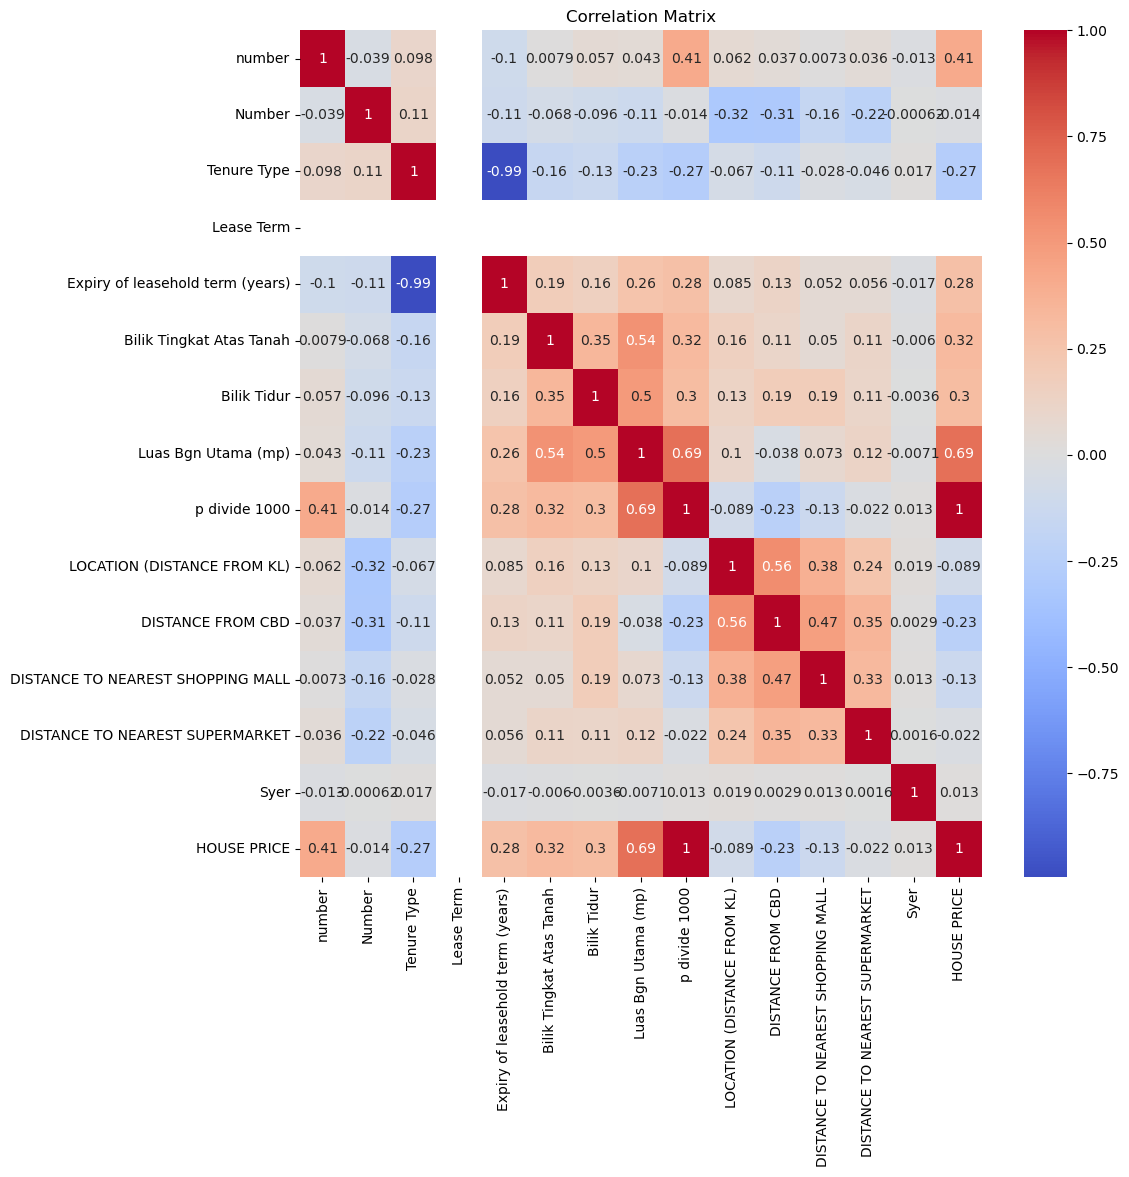

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df.corr()

# Set the figure size
plt.figure(figsize=(11, 11))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



# **Data Pre-processing**




**Data Cleaning**

*Remove Trailing White Spaces*

In [ ]:

# Remove leading and trailing whitespace from column names
df.columns = df.columns.str.strip()

# Remove leading and trailing whitespace from column values
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)



In [ ]:
# Print every columns in the dataset
print(df.columns)


Index(['number', 'Date', 'Number', 'Mukim (Sub District)', 'Section', 'Jen',
       'No LotPlot', 'Siri Status Lot (Nov 08)', 'Tarikh', 'Luas Lot', 'Unit',
       'Jen Hakmilik', 'Hakmilik', 'Jenis Tanah', 'TENURE', 'Tenure Type',
       'Lease Term', 'Tarikh Luput', 'Expiry of leasehold term (years)',
       'Jenis Bangunan', 'Bilik Tingkat Atas Tanah', 'Bilik Tingkat Bwh Tanah',
       'Bilik Tidur', 'Luas Bgn Utama (mp)', 'Nombor Rss Dan  Grid',
       'Grid (Nov 08)', 'Alamat (Address)', 'Kawasan', 'p divide 1000',
       'Region', 'LOCATION (DISTANCE FROM KL)', 'DISTANCE FROM CBD',
       'DISTANCE TO NEAREST SHOPPING MALL', 'DISTANCE TO NEAREST SUPERMARKET',
       'Syer', 'Dibayar', 'HOUSE PRICE', 'race penjual', 'race pembeli'],
      dtype='object')


**Data Cleaning & Transformation Function**

In [ ]:
import numpy as np

def preprocess_data(data):
    df_cleaned = df.copy()

    # Convert "Tenure Type" column to string type
    df_cleaned['Tenure Type'] = df_cleaned['Tenure Type'].astype(str)

    import re
    # Replace empty or missing values with NaN
    df_cleaned['Luas Lot'] = df_cleaned['Luas Lot'].replace('', np.nan)

    # Remove commas and other non-numeric characters from Luas Lot
    df_cleaned['Luas Lot'] = df_cleaned['Luas Lot'].str.replace(',', '').apply(lambda x: re.sub(r'[^\d.]', '', str(x)))

    # Convert empty strings to NaN
    df_cleaned['Luas Lot'] = df_cleaned['Luas Lot'].replace('', np.nan)

    # Convert Luas Lot to float type
    df_cleaned['Luas Lot'] = df_cleaned['Luas Lot'].astype(float)


    # Convert 'Dibayar', 'race pembeli', and 'race penjual' to lowercase if needed
    # Convert 'Dibayar' column to string type

    df_cleaned['Dibayar'] = df_cleaned['Dibayar'].astype(str)

    # Remove commas and other non-numeric characters from 'Dibayar'
    df_cleaned['Dibayar'] = df_cleaned['Dibayar'].str.replace(',', '')

    # Remove rows with invalid values in 'Dibayar' column
    df_cleaned = df_cleaned[df_cleaned['Dibayar'].str.isnumeric()]

    # Convert 'Dibayar' to float
    df_cleaned['Dibayar'] = df_cleaned['Dibayar'].astype(float)



    df_cleaned['race pembeli'] = df_cleaned['race pembeli'].str.lower()
    df_cleaned['race penjual'] = df_cleaned['race penjual'].str.lower()
    df_cleaned['race pembeli'] = df_cleaned['race pembeli'].replace('Chinese', 'chinese')
    df_cleaned['race penjual'] = df_cleaned['race penjual'].replace('Chinese', 'chinese')


    ## HANDLE MEANINGLESS COLUMN
    # Drop the 'No' column as it is a index from df
    df_cleaned.drop('number', axis=1, inplace=True)

    ## HANDLE MISSING VALUES
    # check the original dataframe info
    print(df.isnull().sum())

    empty_value_representation = ''  # Specify the empty value representation you want to replace
    df_cleaned.replace(empty_value_representation, np.nan, inplace=True)

    print("\n")
    print(df_cleaned.isnull().sum())

    # Drop Missing Values
    df_cleaned.drop('Section', axis=1, inplace=True)
    df_cleaned.drop(['Nombor Rss Dan  Grid', 'Grid (Nov 08)'], axis=1, inplace=True)

    # Impute Mode For Categorical
    categorical_features = ['Jen', 'No LotPlot', 'Jen Hakmilik', 'Hakmilik', 'Jenis Tanah','Alamat (Address)', 'Tarikh Luput']
    for feature in categorical_features:
        mode_value = df_cleaned[feature].mode()[0]
        df_cleaned[feature].fillna(mode_value, inplace=True)
    # Impute Median For Numerical
    numerical_features = ['Lease Term','Bilik Tingkat Bwh Tanah', 'DISTANCE TO NEAREST SUPERMARKET']
    for feature in numerical_features:
        median_value = df_cleaned[feature].median()
        df_cleaned[feature].fillna(median_value, inplace=True)

    # Data Imputation For 'Luas Lot' Based On Regression Model
    from sklearn.linear_model import LinearRegression
    import re
    import locale

    # Set the locale for numeric formatting
    locale.setlocale(locale.LC_NUMERIC, '')

    # Convert 'HOUSE PRICE' to string type
    df_cleaned['HOUSE PRICE'] = df_cleaned['HOUSE PRICE'].astype(str)

    # Remove commas from 'HOUSE PRICE'
    df_cleaned['HOUSE PRICE'] = df_cleaned['HOUSE PRICE'].str.replace(',', '')

    # Convert 'HOUSE PRICE' to numerical format
    df_cleaned['HOUSE PRICE'] = df_cleaned['HOUSE PRICE'].apply(lambda x: locale.atof(x) if pd.notnull(x) else x)

    # Drop rows with missing values in 'HOUSE PRICE' or 'Luas Lot'
    df_cleaned = df_cleaned.dropna(subset=['HOUSE PRICE', 'Luas Lot'])

    # Create a regression model using HOUSE PRICE as the predictor and Luas Lot as the target variable
    regression_model = LinearRegression()
    regression_model.fit(df_cleaned[['HOUSE PRICE']], df_cleaned['Luas Lot'])

    # Identify rows with missing values in 'Luas Lot'
    missing_data = df_cleaned[df_cleaned['Luas Lot'].isnull()]

    if not missing_data.empty:
        # Predict missing values in 'Luas Lot' based on 'HOUSE PRICE'
        missing_data['Luas Lot'] = regression_model.predict(missing_data[['HOUSE PRICE']])

        # Update the original dataframe with the imputed values
        df_cleaned.update(missing_data)

    print("\n")
    # Check for duplicated Values
    df_cleaned.duplicated().sum()

    print("\n")
    # Final Checking For Missing Values of DF
    print(df_cleaned.isnull().sum())
    df_cleaned.info()

    print("\n")
    ## SHOW CAT & NUM VALUES AFTER DATA TRANFORMATION
    # Categorical data columns
    categorical_columns = df_cleaned.select_dtypes(include='object').columns
    for column in categorical_columns:
        unique_values = df_cleaned[column].unique()
        print(f"Categorical Column: {column}")
        print(f"Unique Values: {unique_values}")
        print()

    # Numerical data columns
    numerical_columns = df_cleaned.select_dtypes(include=['int', 'float']).columns
    for column in numerical_columns:
        unique_values = df_cleaned[column].unique()
        print(f"Numerical Column: {column}")
        print(f"Unique Values: {unique_values}")
        print()

    return df_cleaned

# Call the preprocess_data function and assign the returned DataFrame to a variable
df_cleaned = preprocess_data(df)


number                                   0
Date                                     0
Number                                   0
Mukim (Sub District)                     0
Section                                  0
Jen                                      0
No LotPlot                               1
Siri Status Lot (Nov 08)                 0
Tarikh                                   0
Luas Lot                                 0
Unit                                     0
Jen Hakmilik                             3
Hakmilik                                 0
Jenis Tanah                              0
TENURE                                   0
Tenure Type                              0
Lease Term                           27692
Tarikh Luput                         27692
Expiry of leasehold term (years)         0
Jenis Bangunan                           0
Bilik Tingkat Atas Tanah                 0
Bilik Tingkat Bwh Tanah                  0
Bilik Tidur                              0
Luas Bgn Ut

Categorical Column: Jen
Unique Values: ['NO. PEJABAT TANAH' 'HAKMILIK MUKTAMAD' 'NO. PEMAJU' 'NO JABATAN'
 'NO. STRATA']

Categorical Column: No LotPlot
Unique Values: ['19241' '19228' '449' ... '30958' '12444' '11691']

Categorical Column: Siri Status Lot (Nov 08)
Unique Values: ['TUNGGAL' 'UTAMA']

Categorical Column: Tarikh
Unique Values: ['20/05/2010' '23/12/2009' '25/11/2010' ... '20/12/2015' '22/01/2016'
 '03/02/2016']

Categorical Column: Unit
Unique Values: ['mp' 'hek']

Categorical Column: Jen Hakmilik
Unique Values: ['HS(D) Pajakan' 'HS(M) Pajakan' 'HS(D) Kekal' 'GERAN' 'PAJAKAN NEGERI'
 'PAJAKAN MUKIM' 'LAIN-LAIN' 'GERAN MUKIM' 'HS(M) Kekal'
 'SURAT PUTUS PERMIT' 'QT(R) Pajakan' 'ENTRY DAERAH REGISTRY']

Categorical Column: Hakmilik
Unique Values: ['237309' '237296' '1407' ... '67721' '6287' '52919']

Categorical Column: Jenis Tanah
Unique Values: ['KEDIAMAN']

Categorical Column: TENURE
Unique Values: ['PAJAKAN' 'KEKAL']

Categorical Column: Tenure Type
Unique Values: ['1' 

In [ ]:
#import numpy as np

# Standard Deviation of the HOUSE PRICE
#house_price_std = df['HOUSE PRICE'].std()
#print('Standard Deviation of House Price:', house_price_std)

# Handle outliers
#z_scores = np.abs((df['HOUSE PRICE'] - df['HOUSE PRICE'].mean()) / df['HOUSE PRICE'].std())
#df = df[z_scores < 3]  # Remove rows with z-score > 3 as outliers

#df.info()


**Exploratory Data Analysis**

*Explore Targeted Variables*

In [ ]:
# Set option to display actual values with commas
pd.set_option('display.float_format', '{:,.0f}'.format)

# Print the house price column's statistical information
housePrice = df_cleaned['HOUSE PRICE'].describe()
print(housePrice)



count      25,366
mean      584,442
std       337,459
min        10,000
25%       346,250
50%       520,000
75%       750,000
max     3,800,000
Name: HOUSE PRICE, dtype: float64


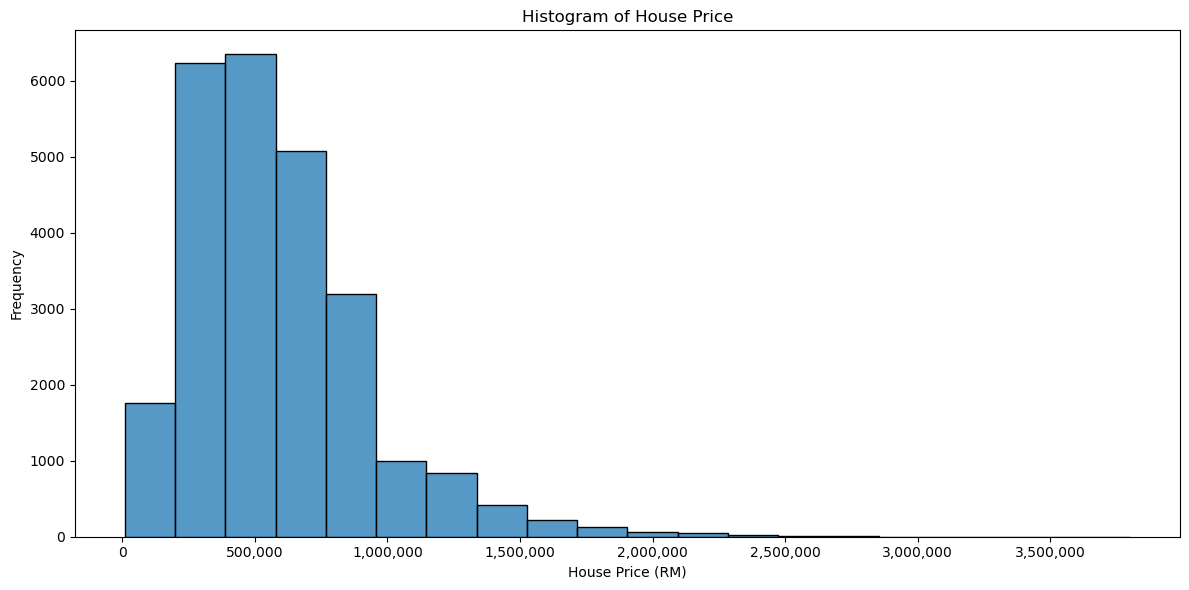

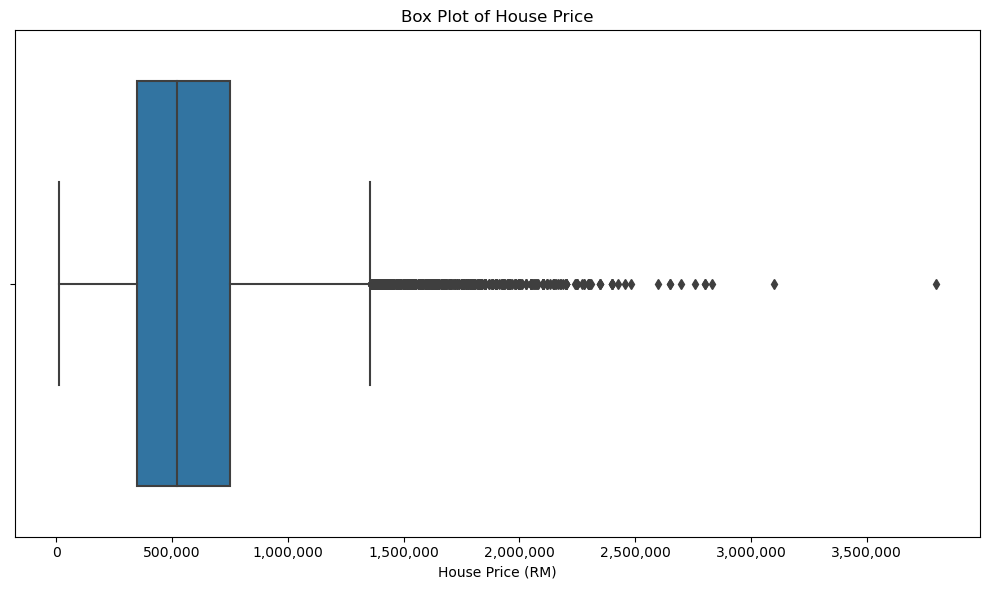

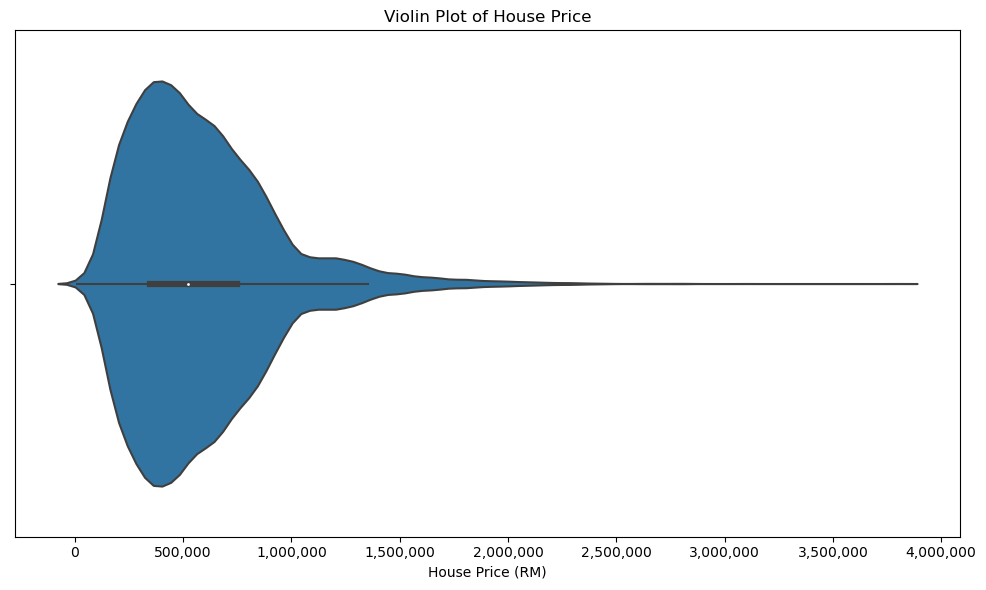

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

# Define format_with_commas function
def format_with_commas(x, pos):
    return "{:,.0f}".format(x)
# Histogram
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['HOUSE PRICE'], bins=20)
plt.xlabel('House Price (RM)')
plt.ylabel('Frequency')
plt.title('Histogram of House Price')
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(format_with_commas))
plt.xticks(rotation=0, wrap=True)  # Wrap x-axis labels
plt.tight_layout()  # Adjust plot layout to prevent overlapping
plt.show()

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned['HOUSE PRICE'])
plt.xlabel('House Price (RM)')
plt.title('Box Plot of House Price')
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(format_with_commas))
plt.xticks(rotation=0, wrap=True)  # Wrap x-axis labels
plt.subplots_adjust(bottom=0.15)  # Adjust spacing between labels
plt.tight_layout()  # Adjust plot layout to prevent overlapping
plt.show()

# Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x=df_cleaned['HOUSE PRICE'])
plt.xlabel('House Price (RM)')
plt.title('Violin Plot of House Price')
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(format_with_commas))
plt.xticks(rotation=0, wrap=True)  # Wrap x-axis labels
plt.subplots_adjust(bottom=0.15)  # Adjust spacing between labels
plt.tight_layout()  # Adjust plot layout to prevent overlapping
plt.show()











*Explore Independent Variables (Numerical)*


C:\Users\ichy4\AppData\Local\Temp\ipykernel_9640\3177777801.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_without_lease_term.corr()


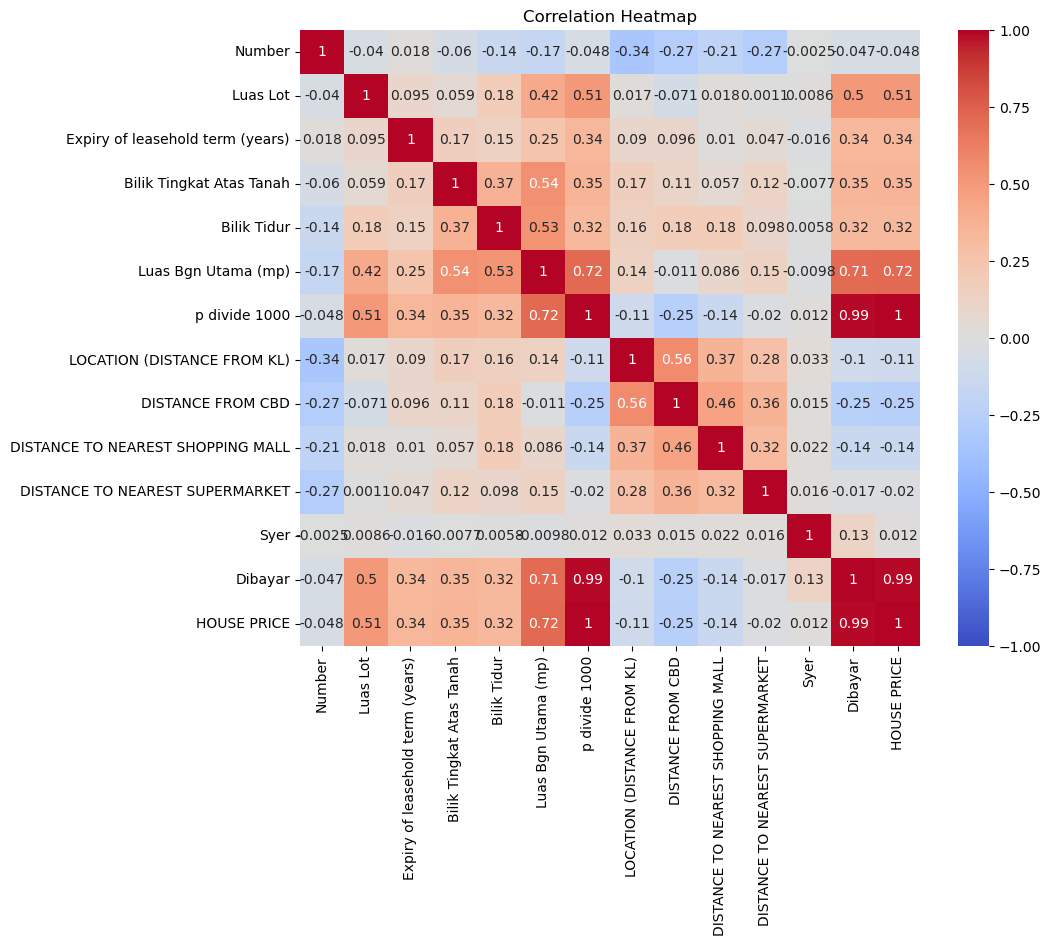

In [ ]:

import seaborn as sns

# Drop the 'Lease Term' column as it has only value '99' showing insufficent variability for correlation
df_without_lease_term = df_cleaned.drop('Lease Term', axis=1)

# Calculate the correlation matrix
correlation_matrix = df_without_lease_term.corr()


# Create a heatmap plot
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()





C:\Users\ichy4\AppData\Local\Temp\ipykernel_9640\3728108301.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_house_price = df_cleaned.corr()['HOUSE PRICE'].drop('HOUSE PRICE')
C:\Users\ichy4\AppData\Local\Temp\ipykernel_9640\3728108301.py:22: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(cmap)


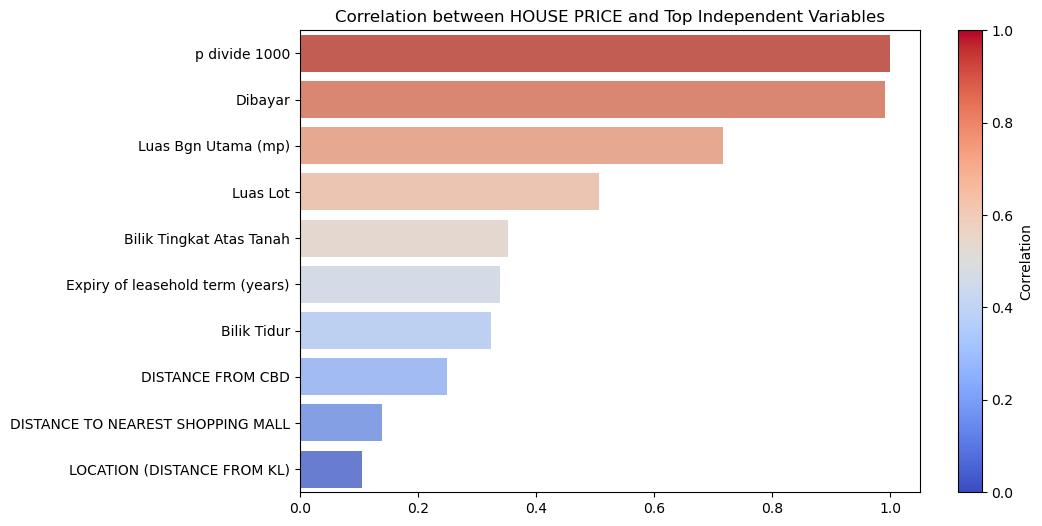

In [ ]:
import matplotlib.cm as cm

# Calculate the correlation between HOUSE PRICE and independent variables
correlation_house_price = df_cleaned.corr()['HOUSE PRICE'].drop('HOUSE PRICE')

# Sort the correlation values in descending order
sorted_corr = correlation_house_price.abs().sort_values(ascending=False)

# Select the top n variables to plot
n = 10
top_variables = sorted_corr[:n]

# Create the bar plot with seaborn using reversed "coolwarm" colormap
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_variables.values, y=top_variables.index, palette='coolwarm_r')

# Create a ScalarMappable object for the colorbar
cmap = cm.ScalarMappable(cmap='coolwarm')
cmap.set_array([])  # Set an empty array

# Add colorbar legend
cbar = plt.colorbar(cmap)
cbar.set_label('Correlation', rotation=90)

# Set the title of the plot
plt.title('Correlation between HOUSE PRICE and Top Independent Variables')

plt.show()






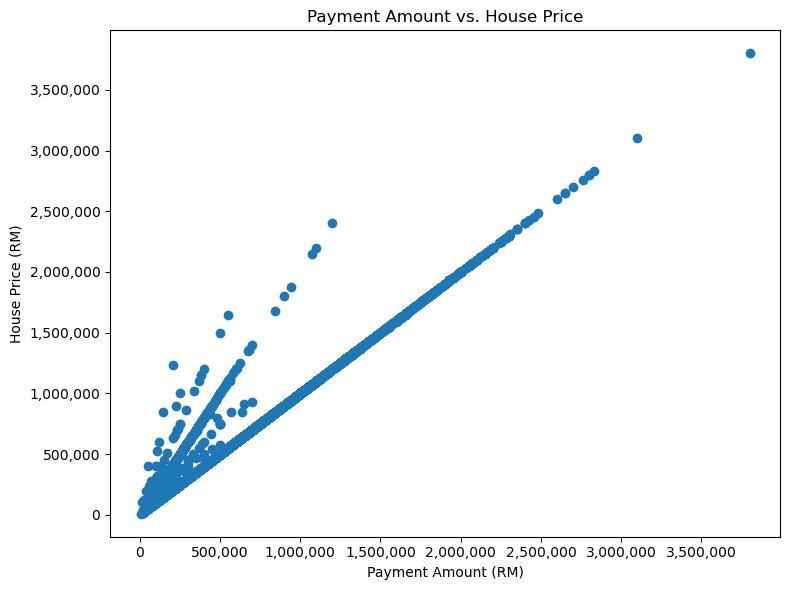

In [ ]:
# Convert 'Dibayar' column to numeric type (assuming it contains numeric values)
df_cleaned['Dibayar'] = pd.to_numeric(df_cleaned['Dibayar'], errors='coerce')

# Format the x-axis and y-axis tick labels
def format_with_commas(x, pos):
    return "{:,.0f}".format(x)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned['Dibayar'], df_cleaned['HOUSE PRICE'])
plt.xlabel('Payment Amount (RM)')
plt.ylabel('House Price (RM)')
plt.title('Payment Amount vs. House Price')

# Set the x-axis and y-axis tick label format
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(format_with_commas))
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(format_with_commas))

plt.tight_layout()
plt.show()


*Explore Independent Variables (Catgorical)*

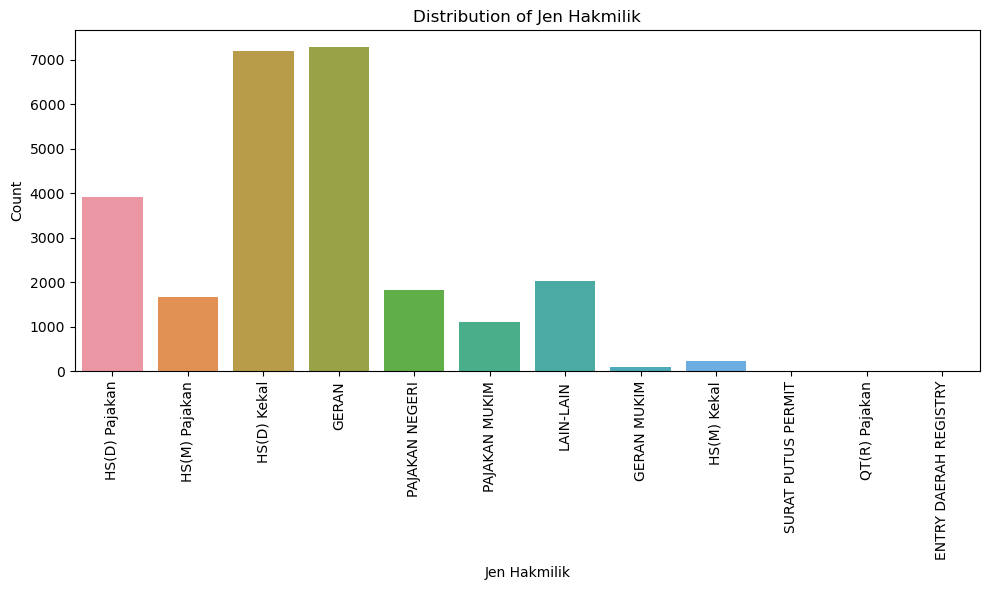

In [ ]:
# Example code for rotating x-axis labels in a bar plot
import seaborn as sns

# Specify the categorical column to visualize
categorical_column = 'Jen Hakmilik'

# Create a bar plot with rotated x-axis labels
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x=categorical_column)
plt.xlabel(categorical_column)
plt.ylabel('Count')
plt.title('Distribution of ' + categorical_column)
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.tight_layout()  # Adjust plot layout to prevent overlapping
plt.show()



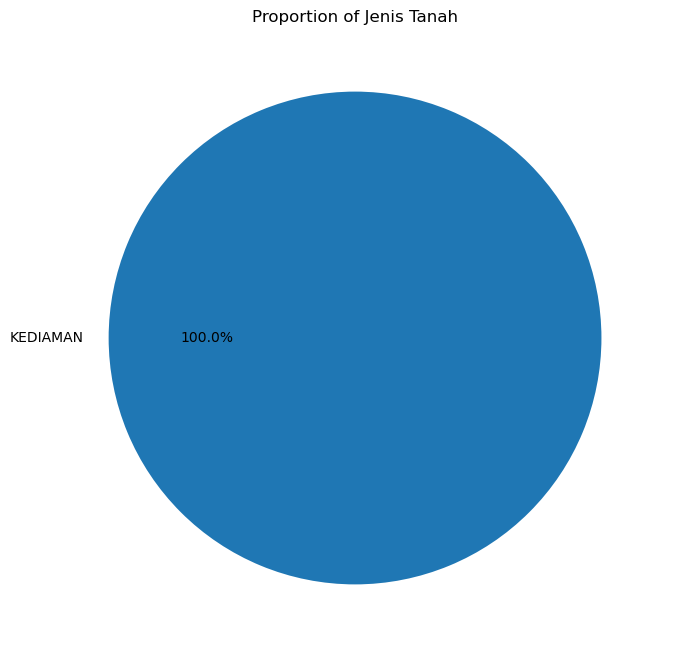

In [ ]:
# Example code for a pie chart using matplotlib
import matplotlib.pyplot as plt

# Specify the categorical column to visualize
categorical_column = 'Jenis Tanah'

# Compute the value counts for each category
category_counts = df_cleaned[categorical_column].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Proportion of ' + categorical_column)
plt.show()



<Figure size 1000x600 with 0 Axes>

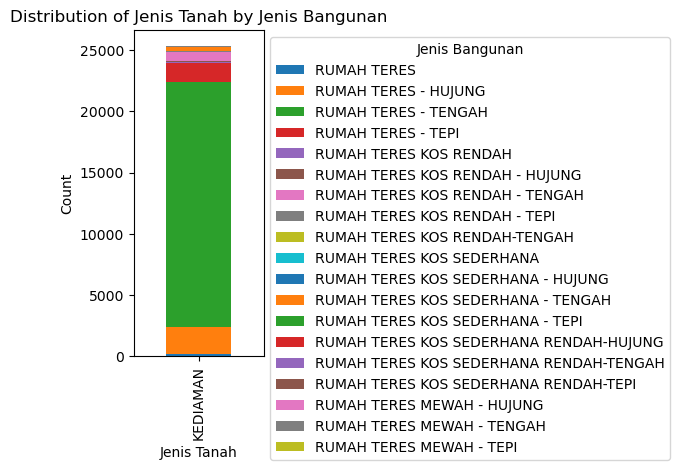

In [ ]:
# Stacked bar plot

# Specify the categorical columns to visualize
categorical_columns = ['Jenis Tanah', 'Jenis Bangunan']

# Compute the cross-tabulation of the two columns
cross_tab = pd.crosstab(df_cleaned[categorical_columns[0]], df_cleaned[categorical_columns[1]])

# Create a stacked bar plot
plt.figure(figsize=(10, 6))
ax = cross_tab.plot(kind='bar', stacked=True)
plt.xlabel(categorical_columns[0])
plt.ylabel('Count')
plt.title('Distribution of ' + categorical_columns[0] + ' by ' + categorical_columns[1])

# Adjust the legend position and title
plt.legend(title=categorical_columns[1], bbox_to_anchor=(1, 1))
plt.tight_layout()  # Adjust plot layout to prevent overlapping

plt.show()





<Figure size 1200x600 with 0 Axes>

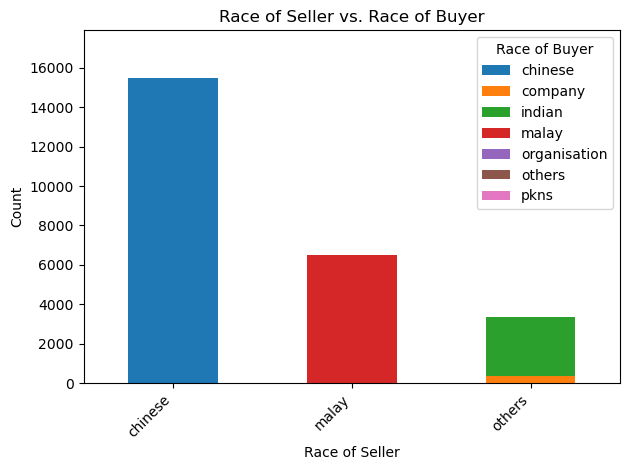

In [ ]:
# Stacked Plot

# Create a cross-tabulation of the two columns
cross_tab = pd.crosstab(df_cleaned['race penjual'], df_cleaned['race pembeli'])

# Create a stacked bar plot
plt.figure(figsize=(12, 6))
ax = cross_tab.plot(kind='bar', stacked=True)

# Set plot labels and title
plt.xlabel('Race of Seller')
plt.ylabel('Count')
plt.title('Race of Seller vs. Race of Buyer')



# Rotate x-axis labels and adjust figure layout
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Adjust the legend position and title
plt.legend(title='Race of Buyer', bbox_to_anchor=(1, 1))

# Adjust y-axis limits for better visibility
plt.ylim(0, ax.get_ylim()[1] * 1.1)

plt.show()





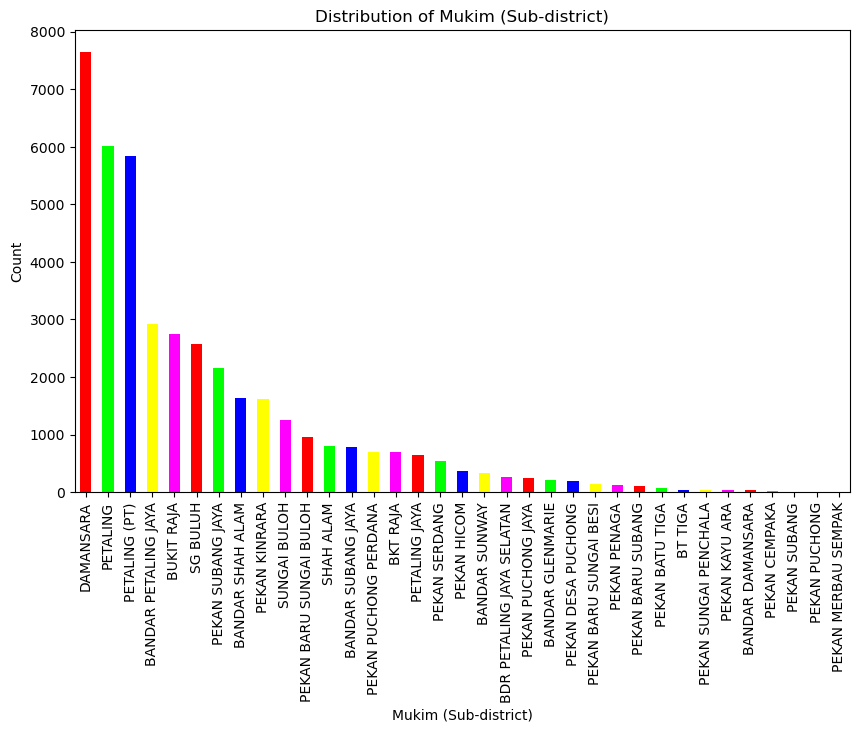

In [ ]:
# Define a custom color palette with solid colors
color_palette = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#FF00FF']

# Bar Plot
plt.figure(figsize=(10, 6))
df['Mukim (Sub District)'].value_counts().plot(kind='bar', color=color_palette)
plt.xlabel('Mukim (Sub-district)')
plt.ylabel('Count')
plt.title('Distribution of Mukim (Sub-district)')
plt.show()


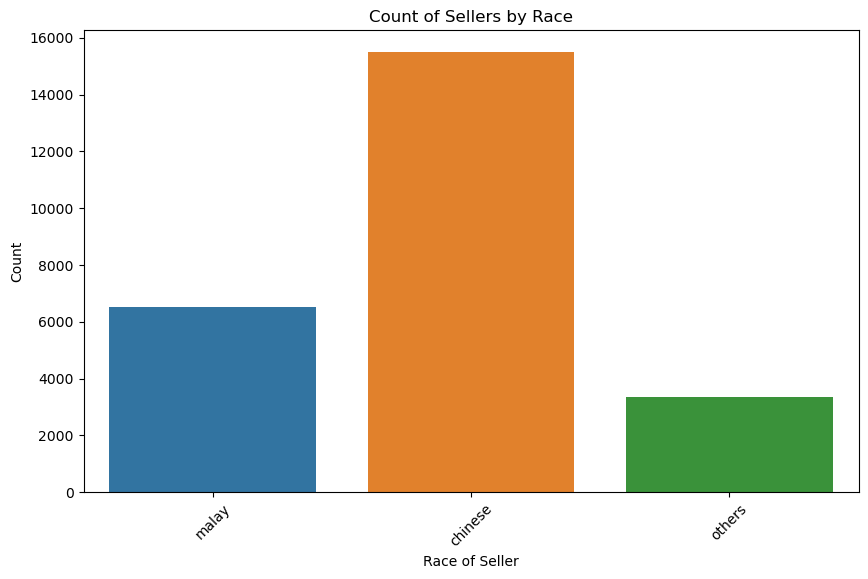

In [ ]:
# Count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='race penjual', data=df_cleaned)
plt.xlabel('Race of Seller')
plt.ylabel('Count')
plt.title('Count of Sellers by Race')
plt.xticks(rotation=45)
plt.show()


<Figure size 1200x600 with 0 Axes>

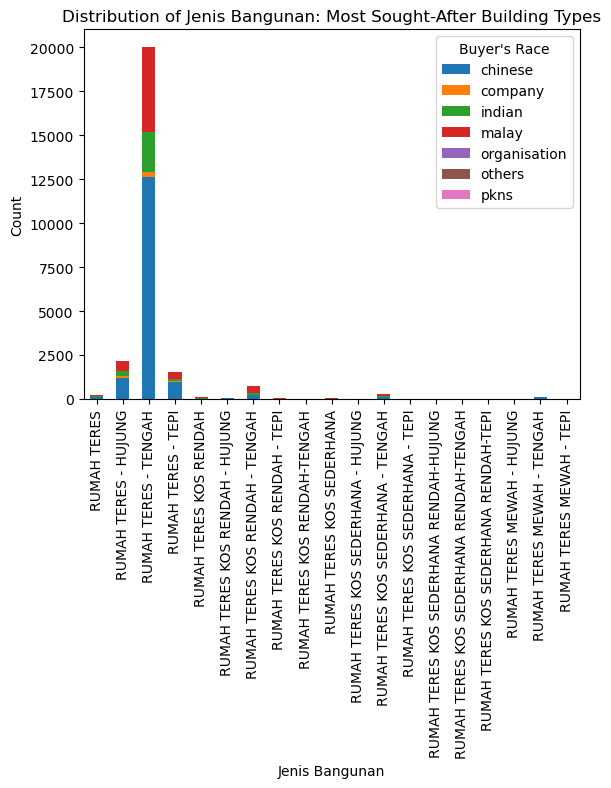

<Figure size 1200x600 with 0 Axes>

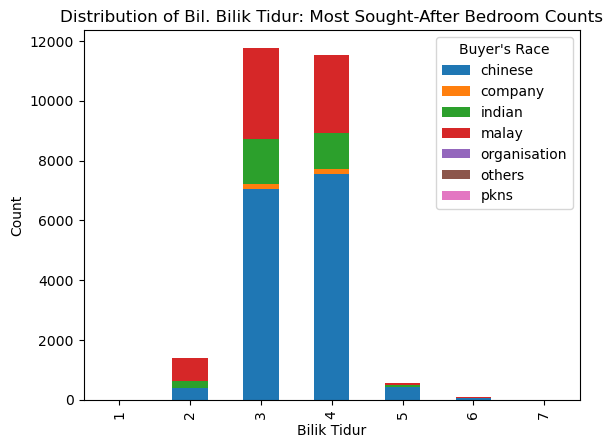

<Figure size 1200x600 with 0 Axes>

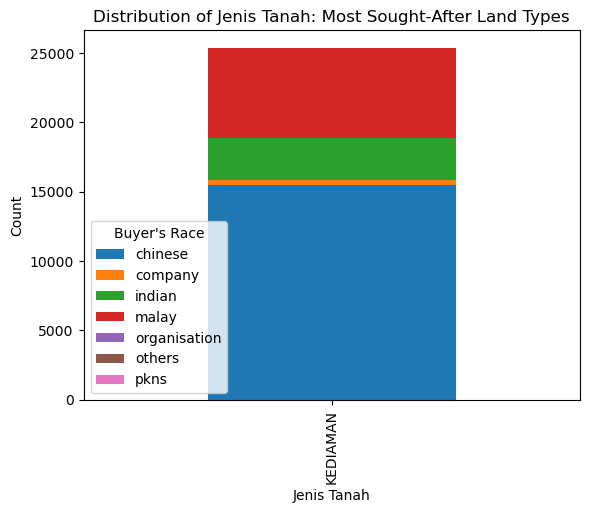

<Figure size 1200x600 with 0 Axes>

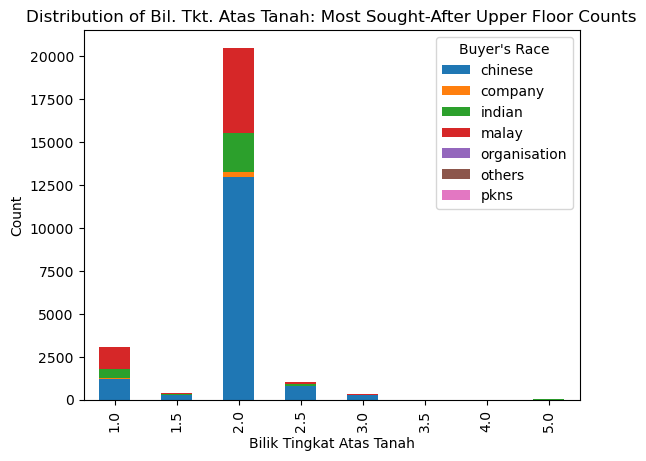

<Figure size 1200x600 with 0 Axes>

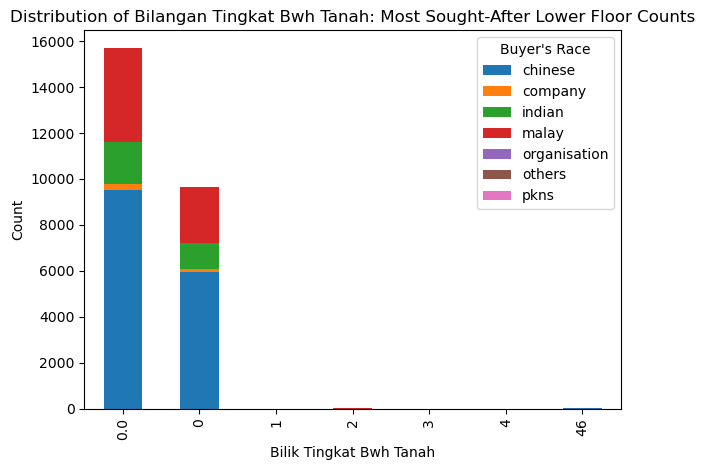

In [ ]:

# Show which house features are highly sought after

# Compute the cross-tabulation for each feature
cross_tab_jenis_bangunan = pd.crosstab(df_cleaned['Jenis Bangunan'], df_cleaned['race pembeli'])
cross_tab_bilik_tidur = pd.crosstab(df_cleaned['Bilik Tidur'], df_cleaned['race pembeli'])
cross_tab_jenis_tanah = pd.crosstab(df_cleaned['Jenis Tanah'], df_cleaned['race pembeli'])
cross_tab_bil_tkt_atas_tanah = pd.crosstab(df_cleaned['Bilik Tingkat Atas Tanah'], df_cleaned['race pembeli'])
cross_tab_bil_tkt_bwh_tanah = pd.crosstab(df_cleaned['Bilik Tingkat Bwh Tanah'], df_cleaned['race pembeli'])

# Plot 1: Distribution of Jenis Bangunan
plt.figure(figsize=(12, 6))
cross_tab_jenis_bangunan.plot(kind='bar', stacked=True)
plt.xlabel('Jenis Bangunan')
plt.ylabel('Count')
plt.title('Distribution of Jenis Bangunan: Most Sought-After Building Types')
plt.legend(title="Buyer's Race")

# Plot 2: Distribution of Bil. Bilik Tidur
plt.figure(figsize=(12, 6))
cross_tab_bilik_tidur.plot(kind='bar', stacked=True)
plt.xlabel('Bilik Tidur')
plt.ylabel('Count')
plt.title('Distribution of Bil. Bilik Tidur: Most Sought-After Bedroom Counts')
plt.legend(title="Buyer's Race")

# Plot 3: Distribution of Jenis Tanah
plt.figure(figsize=(12, 6))
cross_tab_jenis_tanah.plot(kind='bar', stacked=True)
plt.xlabel('Jenis Tanah')
plt.ylabel('Count')
plt.title('Distribution of Jenis Tanah: Most Sought-After Land Types')
plt.legend(title="Buyer's Race")

# Plot 4: Distribution of Bil. Tkt. Atas Tanah
plt.figure(figsize=(12, 6))
cross_tab_bil_tkt_atas_tanah.plot(kind='bar', stacked=True)
plt.xlabel('Bilik Tingkat Atas Tanah')
plt.ylabel('Count')
plt.title('Distribution of Bil. Tkt. Atas Tanah: Most Sought-After Upper Floor Counts')
plt.legend(title="Buyer's Race")

# Plot 5: Distribution of Bil. Tkt. Bwh Tanah
plt.figure(figsize=(12, 6))
cross_tab_bil_tkt_bwh_tanah.plot(kind='bar', stacked=True)
plt.xlabel('Bilik Tingkat Bwh Tanah')
plt.ylabel('Count')
plt.title('Distribution of Bilangan Tingkat Bwh Tanah: Most Sought-After Lower Floor Counts')
plt.legend(title="Buyer's Race")

plt.tight_layout()
plt.show()




*Explore Targeted Variable VS Independent Variables*

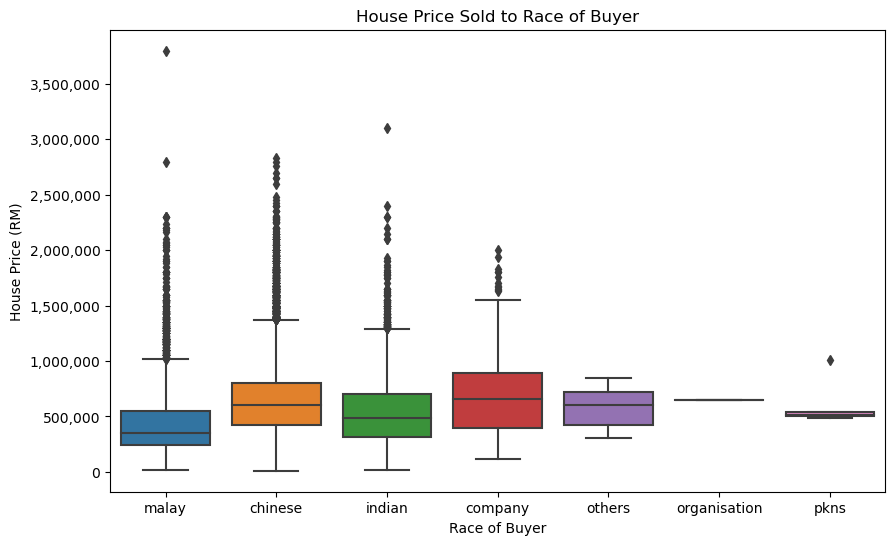

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Format x-axis tick labels to display actual values with commas
def format_with_commas(x, pos):
    return "{:,.0f}".format(x)

# Create a box plot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='race pembeli', y='HOUSE PRICE', data=df_cleaned)
plt.xlabel('Race of Buyer')
plt.ylabel('House Price (RM)')
plt.title('House Price Sold to Race of Buyer')

# Format y-axis labels with commas
ax.yaxis.set_major_formatter(mtick.FuncFormatter(format_with_commas))

# Show the plot
plt.show()






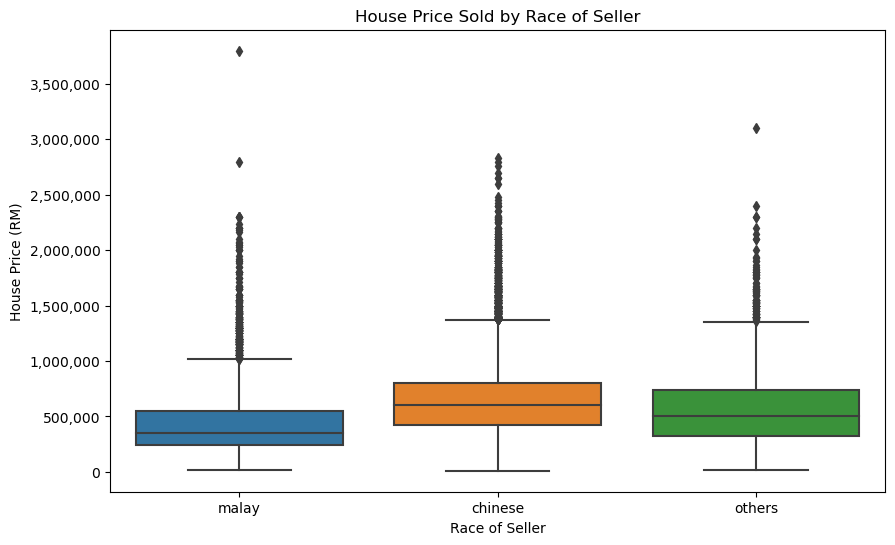

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Format x-axis tick labels to display actual values with commas
def format_with_commas(x, pos):
    return "{:,.0f}".format(x)

# Create a box plot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='race penjual', y='HOUSE PRICE', data=df_cleaned)
plt.xlabel('Race of Seller')
plt.ylabel('House Price (RM)')
plt.title('House Price Sold by Race of Seller')

# Format y-axis labels with commas
ax.yaxis.set_major_formatter(mtick.FuncFormatter(format_with_commas))

# Show the plot
plt.show()






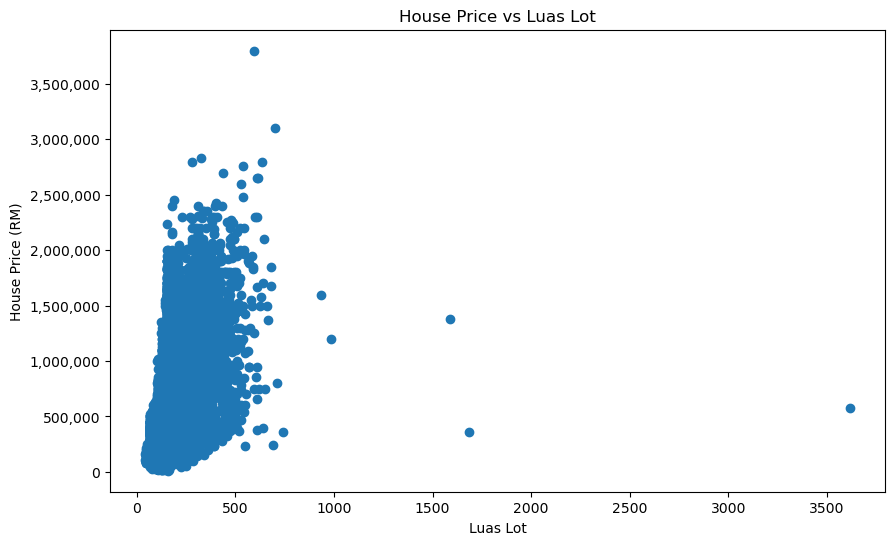

In [ ]:

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['Luas Lot'], df_cleaned['HOUSE PRICE'])

# Format y-axis tick labels with commas and "(RM)" prefix
formatter = mtick.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('Luas Lot')
plt.ylabel('House Price (RM)')
plt.title('House Price vs Luas Lot')

plt.show()


**Split Dataset**

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into input features (X) and target variable (y)
X = df_cleaned.drop('HOUSE PRICE', axis=1)
y = df_cleaned['HOUSE PRICE']

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [ ]:
print(X.shape)
print(y.shape)


(25366, 34)
(25366,)


**Data Transformation**

*Feature Selection (Domain Research)*

In [ ]:
selected_features = ['Luas Lot', 'Tenure Type', 'Expiry of leasehold term (years)',
                     'Jenis Bangunan', 'Bilik Tingkat Atas Tanah', 'Bilik Tidur', 'Luas Bgn Utama (mp)',
                     'Kawasan', 'Region', 'LOCATION (DISTANCE FROM KL)', 'DISTANCE FROM CBD',
                     'DISTANCE TO NEAREST SHOPPING MALL', 'DISTANCE TO NEAREST SUPERMARKET', 'Dibayar', 'Mukim (Sub District)']

# Select numerical and categorical columns
numerical_cols = X_train[selected_features].select_dtypes(include=['float64']).columns
categorical_cols = X_train[selected_features].select_dtypes(include=['object']).columns

# Convert numerical values in categorical columns to strings
X_train[categorical_cols] = X_train[categorical_cols].astype(str)
X_val[categorical_cols] = X_val[categorical_cols].astype(str)
X_test[categorical_cols] = X_test[categorical_cols].astype(str)

# Print the information about X_train DataFrame
print("X_train Info:")
print(X_train.info())

print("X_val Info:")
print(X_val.info())

print("X_test Info:")
print(X_test.info())


X_train Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16233 entries, 33708 to 38220
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               16233 non-null  object 
 1   Number                             16233 non-null  int64  
 2   Mukim (Sub District)               16233 non-null  object 
 3   Jen                                16233 non-null  object 
 4   No LotPlot                         16233 non-null  object 
 5   Siri Status Lot (Nov 08)           16233 non-null  object 
 6   Tarikh                             16233 non-null  object 
 7   Luas Lot                           16233 non-null  float64
 8   Unit                               16233 non-null  object 
 9   Jen Hakmilik                       16233 non-null  object 
 10  Hakmilik                           16233 non-null  object 
 11  Jenis Tanah                        1

*Feature Scaling, Encoding, Pre-processing Transformer*



In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Create the transformers for feature scaling and one-hot encoding
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Fit and apply the preprocessing steps to X_train
X_train_preprocessed = preprocessor.fit_transform(X_train[selected_features])

# Apply the preprocessing steps to X_val and X_test
X_val_preprocessed = preprocessor.transform(X_val[selected_features])
X_test_preprocessed = preprocessor.transform(X_test[selected_features])


# Print information about the datasets
print("Training set info:")
print("Shape:", X_train_preprocessed.shape)
print("Data type:", type(X_train_preprocessed))
print("Ratio:", X_train_preprocessed.shape[0] / X.shape[0])
print("\n")

print("Validation set info:")
print("Shape:", X_val_preprocessed.shape)
print("Data type:", type(X_val_preprocessed))
print("Ratio:", X_val_preprocessed.shape[0] / X.shape[0])
print("\n")
print("Test set info:")
print("Shape:", X_test_preprocessed.shape)
print("Data type:", type(X_test_preprocessed))
print("Ratio:", X_test_preprocessed.shape[0] / X.shape[0])
print("\n")


Training set info:
Shape: (16233, 388)
Data type: <class 'scipy.sparse._csr.csr_matrix'>
Ratio: 0.6399511156666404


Validation set info:
Shape: (4059, 388)
Data type: <class 'scipy.sparse._csr.csr_matrix'>
Ratio: 0.16001734605377277


Test set info:
Shape: (5074, 388)
Data type: <class 'scipy.sparse._csr.csr_matrix'>
Ratio: 0.20003153827958686




**Baseline Model**

In [ ]:
from sklearn.metrics import mean_squared_error

# Create a baseline model that predicts the mean value of the target variable for all instances
baseline_predictions = [y_train.mean()] * len(y_test)

# Calculate the mean squared error of the baseline model
baseline_mse = mean_squared_error(y_test, baseline_predictions)

print("Baseline Mean Squared Error:", baseline_mse)



Baseline Mean Squared Error: 112914576211.93152


# **Model Selection**

**Hyperparameter Tuning & K-fold Cross Validation**

In [ ]:
import time

start_time = time.time()

# Code segment to measure execution time

end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")


from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
import xgboost as xgb

# Define the hyperparameter grids for tuning
param_grid = {
    'lasso': {'alpha': [0.1, 1.0, 10.0]},
    'ridge': {'alpha': [0.1, 1.0, 10.0]},
    'elasticnet': {'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0.1, 0.5, 0.9]},
    'gradient_boosting': {'n_estimators': [100, 200, 500], 'learning_rate': [0.01, 0.1, 1.0], 'max_depth': [3, 5, 7]},
    'mlp': {'hidden_layer_sizes': [(100,), (50, 50), (50, 100, 50)], 'activation': ['relu', 'tanh', 'logistic'], 'alpha': [0.01, 0.1, 1.0], 'learning_rate': ['constant', 'invscaling', 'adaptive'], 'max_iter': [20000, 30000, 40000]},
    'lightgbm': {'boosting_type': ['gbdt', 'dart', 'goss'], 'learning_rate': [0.01, 0.1, 1.0], 'max_depth': [3, 5, 7], 'num_leaves': [31, 50, 100], 'reg_alpha': [0.1, 0.5, 1.0], 'reg_lambda': [0.1, 0.5, 1.0]},
    'xgboost': {'booster': ['gbtree', 'gblinear', 'dart'], 'learning_rate': [0.01, 0.1, 1.0], 'max_depth': [3, 5, 7], 'subsample': [0.8, 1.0], 'colsample_bytree': [0.8, 1.0], 'reg_alpha': [0.1, 0.5, 1.0], 'reg_lambda': [0.1, 0.5, 1.0]}
}

# Create the models
models = {
    'lasso': Lasso(max_iter=100000),
    'ridge': Ridge(),
    'elasticnet': ElasticNet(max_iter=100000),
    'gradient_boosting': GradientBoostingRegressor(random_state=42),
    'mlp': MLPRegressor(max_iter=10000, early_stopping=True, random_state=42),
    'lightgbm': lgb.LGBMRegressor(random_state=42),
    'xgboost': xgb.XGBRegressor(random_state=42)
}

# Define the number of folds for cross-validation
n_folds = 5

# Iterate over the models and perform GridSearchCV or RandomizedSearchCV for hyperparameter tuning with k-fold cross-validation
best_models = []
for model_name, model in models.items():
    param_grid_model = param_grid[model_name]

    if len(param_grid_model) <= 10:
        # Use GridSearchCV for smaller parameter grids
        grid_search = GridSearchCV(model, param_grid_model, scoring='neg_mean_squared_error', cv=KFold(n_splits=n_folds, shuffle=True)
)
    else:
        # Use RandomizedSearchCV for larger parameter grids
        grid_search = RandomizedSearchCV(model, param_grid_model, scoring='neg_mean_squared_error', cv=KFold(n_splits=n_folds, shuffle=True), n_iter=10)

    grid_search.fit(X_train_preprocessed, y_train)

    # Get the best model and its associated hyperparameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Perform cross-validation on the best model using the training set
    cv_scores = cross_val_score(best_model, X_train_preprocessed, y_train, scoring='neg_mean_squared_error', cv=KFold(n_splits=n_folds, shuffle=True))

    # Calculate the mean and standard deviation of the cross-validation scores
    cv_mean = -cv_scores.mean()
    cv_std = cv_scores.std()

    # Evaluate the best model on the validation set
    val_predictions = best_model.predict(X_val_preprocessed)
    val_mse = mean_squared_error(y_val, val_predictions)

    # Store the best model and its performance
    best_models.append((best_model, cv_mean, cv_std, best_params, model_name, val_mse))

# Sort the best models based on cross-validation mean squared error in descending order
best_models_sorted = sorted(best_models, key=lambda x: x[1], reverse=True)

# Print the top models and their associated hyperparameters
for i, (model, cv_mean, cv_std, best_params, model_name, val_mse) in enumerate(best_models_sorted[:3]):
    print(f"Model {i+1}: {model_name}")
    print("Best Model:", model)
    print("Best Parameters:", best_params)
    print("Cross-Validation Mean Squared Error:", cv_mean)
    print("Cross-Validation Standard Deviation:", cv_std)
    print("Validation Set Mean Squared Error:", val_mse)
    print("\n")


Execution time: 0.0 seconds
[23:11:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:11:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:11:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:11:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:11:20] WARNING: C:\buildkite-agent\build

[23:11:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:11:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:11:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:11:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:11:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-auto

[23:11:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:11:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:11:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:11:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:11:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-auto

[23:12:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:12:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:12:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:12:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:12:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-auto

[23:12:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:12:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:12:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:12:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:12:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-auto

[23:12:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:12:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:12:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:12:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:12:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-auto

[23:12:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:12:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:12:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:12:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:12:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-auto

[23:13:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:13:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:13:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:13:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:13:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-auto

[23:13:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:13:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:13:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:13:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:13:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-auto

[23:13:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:13:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:13:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:13:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:13:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-auto

[23:13:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:13:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:13:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:13:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:13:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-auto

[23:14:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:14:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:14:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:14:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:14:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-auto

[23:14:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:14:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:14:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:14:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:14:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-auto

[23:14:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:14:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:14:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:14:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:14:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-auto

[23:14:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:14:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:14:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:14:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:14:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-auto

[23:15:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:15:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:15:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:15:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:15:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-auto

[23:15:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:15:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:15:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:15:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:15:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-auto

[23:15:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:15:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:15:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:15:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:15:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-auto

[23:15:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:15:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:15:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:15:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:15:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-auto

[23:16:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:16:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:16:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:16:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:16:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-auto

[23:16:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:16:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:16:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:16:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:16:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-auto

[23:16:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:16:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:16:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:16:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:16:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-auto

[23:16:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:16:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:16:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:16:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:16:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-auto

[23:17:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:17:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:17:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:17:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:17:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-auto

[23:17:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:17:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:17:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:17:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:17:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-auto

[23:17:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:17:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:17:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:17:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:17:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-auto

[23:17:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:17:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:17:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:17:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:17:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-auto

[23:18:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:18:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:18:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:18:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:18:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-auto

[23:18:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:18:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:18:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:18:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:18:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-auto

[23:18:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:18:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:18:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:18:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:18:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-auto

[23:18:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:18:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:18:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:18:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:18:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-auto

[23:19:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:19:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:19:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:19:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:19:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-auto

[23:19:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:19:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:19:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:19:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:19:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-auto

[23:19:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:19:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:19:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:19:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:19:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-auto

[23:19:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:19:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:19:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:19:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:19:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-auto

[23:20:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:20:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:20:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:20:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:20:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-auto

[23:20:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:20:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:20:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:20:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:20:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-auto

[23:20:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:20:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:20:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:20:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:20:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-auto

[23:20:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:20:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:20:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:20:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:20:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-auto

[23:21:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:21:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:21:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:21:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:21:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-auto

[23:21:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:21:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:21:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:21:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:21:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-auto

[23:21:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:21:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:21:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:21:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:21:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-auto

[23:21:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:21:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:21:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:21:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:21:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-auto

[23:22:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:22:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:22:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:22:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:22:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-auto

[23:22:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:22:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:22:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:22:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } are not used.

[23:22:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-auto

Model 1: lightgbm
Best Model: LGBMRegressor(boosting_type='goss', max_depth=7, random_state=42, reg_alpha=1.0,
              reg_lambda=0.5)
Best Parameters: {'boosting_type': 'goss', 'learning_rate': 0.1, 'max_depth': 7, 'num_leaves': 31, 'reg_alpha': 1.0, 'reg_lambda': 0.5}
Cross-Validation Mean Squared Error: 2204216726.332423
Cross-Validation Standard Deviation: 613043830.513637
Validation Set Mean Squared Error: 1667278633.6142597


Model 2: elasticnet
Best Model: ElasticNet(alpha=0.1, l1_ratio=0.9, max_iter=100000)
Best Parameters: {'alpha': 0.1, 'l1_ratio': 0.9}
Cross-Validation Mean Squared Error: 2200178332.079304
Cross-Validation Standard Deviation: 220980681.6716072
Validation Set Mean Squared Error: 1770424654.9242444


Model 3: mlp
Best Model: MLPRegressor(alpha=1.0, early_stopping=True, hidden_layer_sizes=(50, 100, 50),
             max_iter=20000, random_state=42)
Best Parameters: {'activation': 'relu', 'alpha': 1.0, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 

In [ ]:
# Find the highest performing model based on cross-validation mean squared error
best_model_index = 0
for i, model_info in enumerate(best_models):
    model, cv_mean, _, _, model_name, _ = model_info
    if cv_mean < best_models[best_model_index][1]:
        best_model_index = i

# Get information about the highest performing model
best_model = best_models[best_model_index][0]
best_model_name = best_models[best_model_index][4]  # Update the index to 4
best_model_alpha = best_models[best_model_index][3]

# Evaluate the best model on the test set
y_test_pred = best_model.predict(X_test_preprocessed)
mse_test = mean_squared_error(y_test, y_test_pred)

# Model Evaluation Results
print("Model Evaluation Results")
print("-----------------------")
for i, model_info in enumerate(best_models):
    print(f"\nModel {i+1}:")
    model = model_info[0]
    cv_mean = model_info[1]
    cv_std = model_info[2]
    alpha = model_info[3]
    model_name = model_info[4]

    print("  Model Name:", model_name)
    print("  Best Model:", model)
    print("  Cross-Validation Mean Squared Error:", f"{cv_mean:.2f}")
    print("  Cross-Validation Standard Deviation:", f"{cv_std:.2f}")
    print("  Best Alpha/C:", alpha)

# Summary Statistics
cv_mse_mean = [model[1] for model in best_models]
cv_mse_std = [model[2] for model in best_models]
print("\nSummary Statistics:")
print("-------------------")
print(f"Mean CV Mean Squared Error: {np.mean(cv_mse_mean):.2f}")
print(f"Mean CV Standard Deviation: {np.mean(cv_mse_std):.2f}")

# Highest Performing Model (Evaluated on Test Set)
print("\nHighest Performing Model (Evaluated on Test Set)")
print("------------------------------------------------")
print("Model:", best_model_name)
print("Best Alpha/C:", best_model_alpha)
print("Mean Squared Error on Test Set:", f"{mse_test:.2f}")


Model Evaluation Results
-----------------------

Model 1:
  Model Name: lasso
  Best Model: Lasso(alpha=10.0, max_iter=100000)
  Cross-Validation Mean Squared Error: 2176902752.03
  Cross-Validation Standard Deviation: 306367824.98
  Best Alpha/C: {'alpha': 10.0}

Model 2:
  Model Name: ridge
  Best Model: Ridge(alpha=10.0)
  Cross-Validation Mean Squared Error: 2175474890.68
  Cross-Validation Standard Deviation: 617035280.76
  Best Alpha/C: {'alpha': 10.0}

Model 3:
  Model Name: elasticnet
  Best Model: ElasticNet(alpha=0.1, l1_ratio=0.9, max_iter=100000)
  Cross-Validation Mean Squared Error: 2200178332.08
  Cross-Validation Standard Deviation: 220980681.67
  Best Alpha/C: {'alpha': 0.1, 'l1_ratio': 0.9}

Model 4:
  Model Name: gradient_boosting
  Best Model: GradientBoostingRegressor(random_state=42)
  Cross-Validation Mean Squared Error: 2186248299.30
  Cross-Validation Standard Deviation: 515217996.37
  Best Alpha/C: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}



# **Model Training**

In [ ]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor

# Set the hyperparameters for the MLP model
learning_rate = 0.1
max_depth = 3
n_estimators = 100
random_state = 42


# Create the MLP model with modified parameters
gb_model = GradientBoostingRegressor(learning_rate=learning_rate, max_depth=max_depth, n_estimators=n_estimators, random_state=random_state)

# Train the MLP model on the training set
gb_model.fit(X_train_preprocessed, y_train)


# Evaluate the model on the training set
train_predictions = gb_model.predict(X_train_preprocessed)
train_mse = mean_squared_error(y_train, train_predictions)
print("GB Model")
print("-------")
print(f"Mean Squared Error on Training Set: {train_mse:.2f}")

# Evaluate the model on the validation set
val_predictions = gb_model.predict(X_val_preprocessed)
val_mse = mean_squared_error(y_val, val_predictions)
print(f"Mean Squared Error on Validation Set: {val_mse:.2f}")

# Evaluate the model on the test set
test_predictions = gb_model.predict(X_test_preprocessed)
test_mse = mean_squared_error(y_test, test_predictions)
print(f"Mean Squared Error on Test Set: {test_mse:.2f}")



from sklearn.model_selection import cross_val_score

# Perform cross-validation with gb
cv_scores = cross_val_score(gb_model, X_train_preprocessed, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate the mean squared error (MSE) from the cross-validation scores
cv_mse = -cv_scores.mean()

# Print the cross-validated MSE
print("\nGB Model (Cross-Validation)")
print("-------")
print(f"Mean Squared Error from Cross-Validation: {cv_mse:.2f}")





GB Model
-------
Mean Squared Error on Training Set: 1625299130.53
Mean Squared Error on Validation Set: 1597560916.94
Mean Squared Error on Test Set: 1668818318.45

GB Model (Cross-Validation)
-------
Mean Squared Error from Cross-Validation: 2188242829.06

Predictions on Test Set:
-------
[561734.80842519 284004.65730996 332301.05070573 ... 730343.58602899
 304495.43909862 646322.23267336]


# **Model Evaluation**

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error, explained_variance_score, median_absolute_error, max_error

# Define a function to format numerical values with commas as thousands separators
def format_with_commas(value):
    return f"{value:,.2f}"

print("GB Model Evaluation Metrics")
print("--------------------------------------")
# Evaluate the best model on the test set
y_test_pred = best_model.predict(X_test_preprocessed)

# Calculate R-squared score on the test set
r2_score_test = best_model.score(X_test_preprocessed, y_test)
print(f"R-squared Score on Test Set: {format_with_commas(r2_score_test)}")

# Mean Absolute Error on the test set
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f"Mean Absolute Error on Test Set: {format_with_commas(mae_test)}")

# Root Mean Squared Error on the test set
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
print(f"Root Mean Squared Error on Test Set: {format_with_commas(rmse_test)}")

# Mean Squared Logarithmic Error on the test set
msle_test = mean_squared_log_error(y_test, y_test_pred)
print(f"Mean Squared Logarithmic Error on Test Set: {format_with_commas(msle_test)}")

# Explained Variance Score on the test set
evs_test = explained_variance_score(y_test, y_test_pred)
print(f"Explained Variance Score on Test Set: {format_with_commas(evs_test)}")

# Median Absolute Error on the test set
medae_test = median_absolute_error(y_test, y_test_pred)
print(f"Median Absolute Error on Test Set: {format_with_commas(medae_test)}")

# Max Error on the test set
max_err_test = max_error(y_test, y_test_pred)
print(f"Max Error on Test Set: {format_with_commas(max_err_test)}")

# Print the predictions
print("\nPredictions on Test Set:")
print("------------------------")
for pred, actual in zip(test_predictions, y_test):
    print(f"Predicted: {pred:.2f}\tActual: {actual:.2f}")

# Create a scatter plot of actual vs predicted prices
plt.scatter(y_test, test_predictions, alpha=0.5)
plt.plot(np.linspace(min(y_test), max(y_test), 100), np.linspace(min(y_test), max(y_test), 100), color='red', linestyle='--', label='Ideal')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.show()



GB Model Evaluation Metrics
--------------------------------------
R-squared Score on Test Set: 0.99
Mean Absolute Error on Test Set: 10,598.69
Root Mean Squared Error on Test Set: 39,790.41
Mean Squared Logarithmic Error on Test Set: 0.01
Explained Variance Score on Test Set: 0.99
Median Absolute Error on Test Set: 3,208.31
Max Error on Test Set: 665,817.81


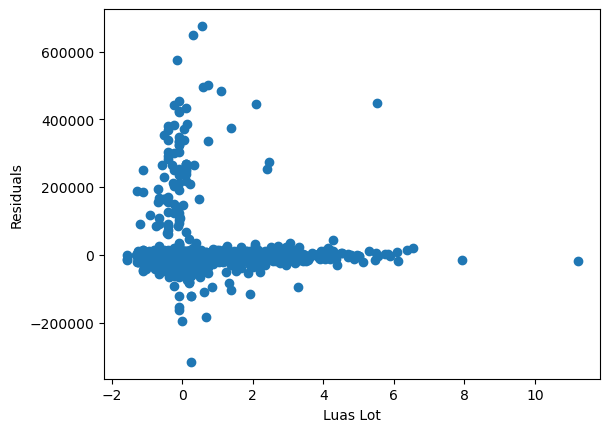

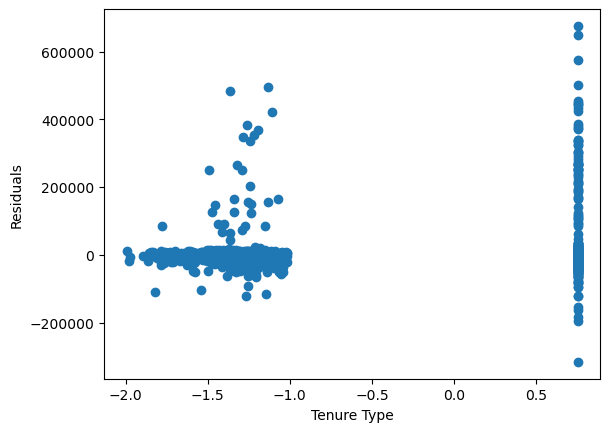

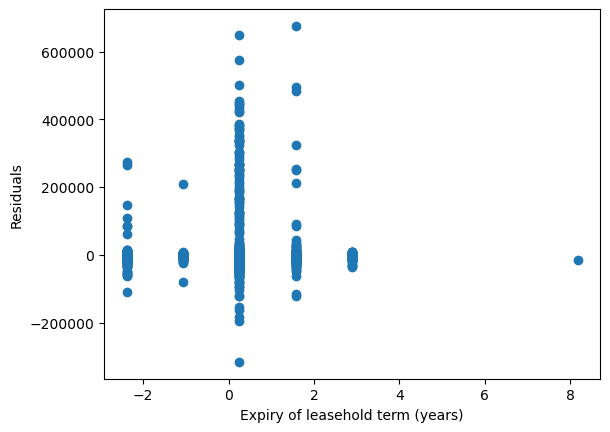

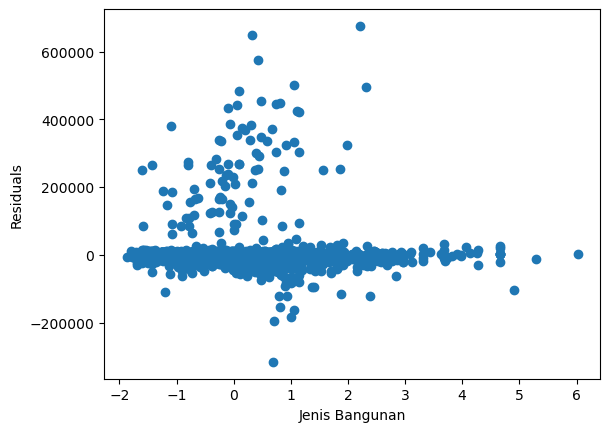

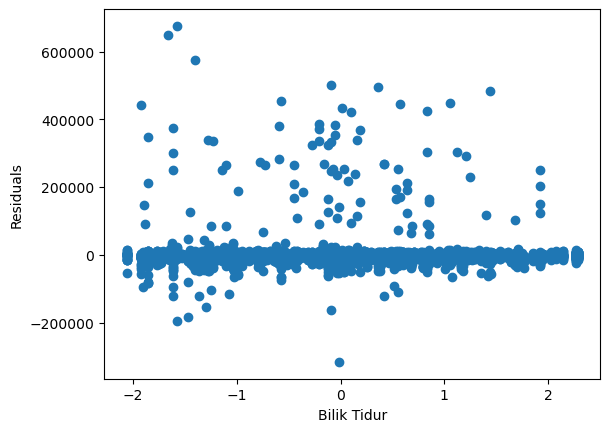

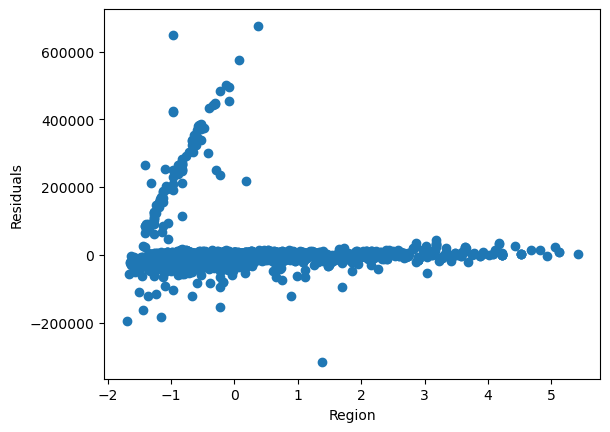

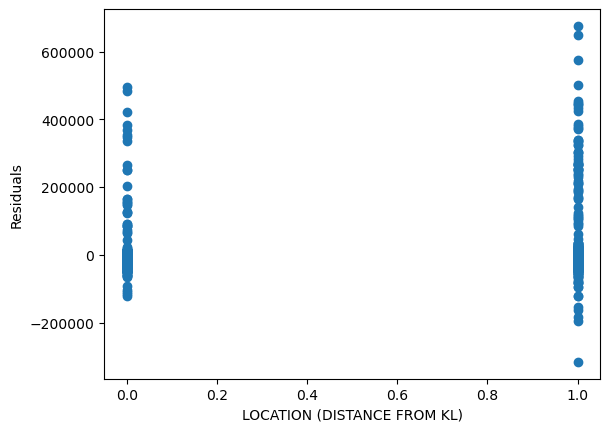

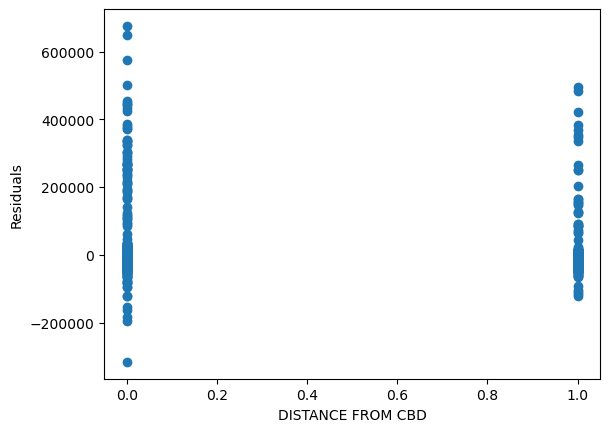

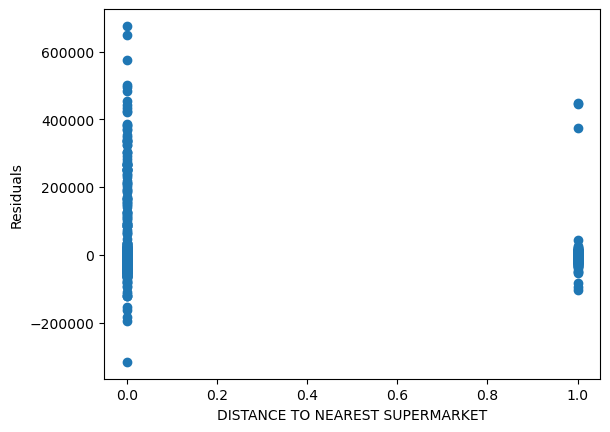

In [ ]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression

# Define the number of top features to select
k = 16

# Create the feature selection selector
selector = SelectKBest(score_func=f_regression, k=k)

# Fit the selector on the training data
selector.fit(X_train_preprocessed, y_train)

# Calculate the residuals
residuals = y_test - test_predictions

# Get the selected feature indices and names
selected_indices = selector.get_support(indices=True)
selected_feature_names = [
    selected_features[i] for i in selected_indices if i < len(selected_features)
]

# Define X_test_selected based on your specific use case
X_test_selected = selector.transform(X_test_preprocessed)

# Convert the sparse matrix to a dense matrix
X_test_selected_dense = X_test_selected.toarray()

# Plot the residuals against each selected feature
for i, feature in enumerate(selected_feature_names):
    feature_values = X_test_selected_dense[:, i]
    if len(feature_values) == len(residuals):
        plt.scatter(feature_values, residuals)
        plt.xlabel(feature)
        plt.ylabel("Residuals")
        plt.show()
    else:
        print(f"Error: Mismatch in sizes for feature '{feature}'")







# **Housing Price Simulator**

In [ ]:
import joblib

# Train and preprocess the model

# Save the trained model
joblib.dump(gb_model, 'model.pkl')

# Save the preprocessor for the model
joblib.dump(preprocessor, 'preprocessor_model.pkl')


['preprocessor_model.pkl']

In [ ]:
# Train and save your model
import pickle

model = gb_model  # Your trained model
filename = 'gb_model.pkl'
pickle.dump(model, open(filename, 'wb'))
